# Цветокоррекция с матричным преобразованием

In [1430]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [1431]:
# Цвета колорчекера
known_rgb = np.array([
    [115, 82, 68],     # dark skin
    [194, 150, 130],   # light skin
    [98, 122, 157],    # blue sky
    [87, 108, 67],     # foliage
    [133, 128, 177],   # blue flower
    [103, 189, 170],   # bluish green
    [214, 126, 44],    # orange
    [80, 91, 166],     # purplish blue
    [193, 90, 99],     # moderate red
    [94, 60, 108],     # purple
    [157, 188, 64],    # yellow green
    [224, 163, 46],    # orange yellow
    [56, 61, 150],     # blue
    [70, 148, 73],     # green
    [175, 54, 60],     # red
    [231, 199, 31],    # yellow
    [187, 86, 149],    # magenta
    [8, 133, 161],     # cyan
    [243, 243, 242],   # white
    [200, 200, 200],   # neutral 8
    [160, 160, 160],   # neutral 6.5
    [122, 122, 121],   # neutral 5
    [85, 85, 85],      # neutral 3.5
    [52, 52, 52]       # black
])

In [1432]:
# загрузка изображения
# img = cv2.imread('Color_Checker.pdf.jpg')
img = cv2.imread('bad_color_checker.jpg')
# img = cv2.imread('24.jpg')
# img = cv2.imread('very_bad_color_checker.jpg')
# img = cv2.imread('oversaturated_color_checker.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
normalized = gray_img / 255.0

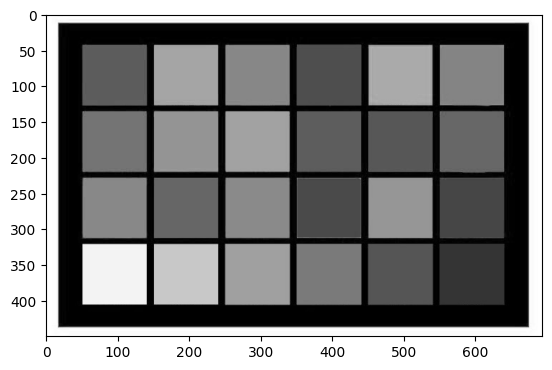

In [1433]:
plt.imshow(Image.fromarray(normalized * 255))

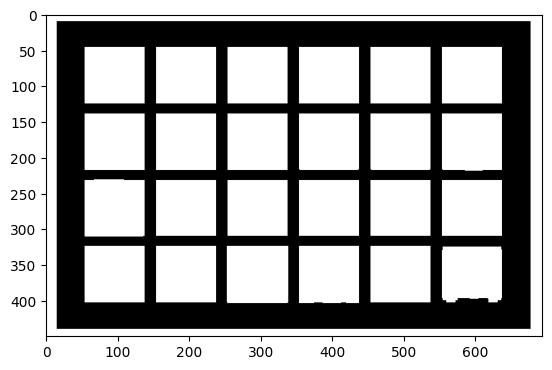

In [1434]:
_, thresh = cv2.threshold(normalized, 0.2, 1, cv2.THRESH_BINARY)
thresh = cv2.erode(thresh, None, iterations=5)
thresh = cv2.dilate(thresh, None, iterations=2)
plt.imshow(Image.fromarray(thresh * 255))

In [1435]:
# нахождение контуров
contours, _ = cv2.findContours(thresh.astype(np.uint8), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [1436]:
# фильтрация контуров
filtered_contours = []

for cnt in contours:
    approx = cv2.approxPolyDP(cnt, .02 * cv2.arcLength(cnt, True), True)
    if len(approx) == 4 and cv2.contourArea(cnt) > 10 and cv2.contourArea(cnt) <= (gray_img.shape[0] * gray_img.shape[1] * 0.4):
        filtered_contours.append(cnt)

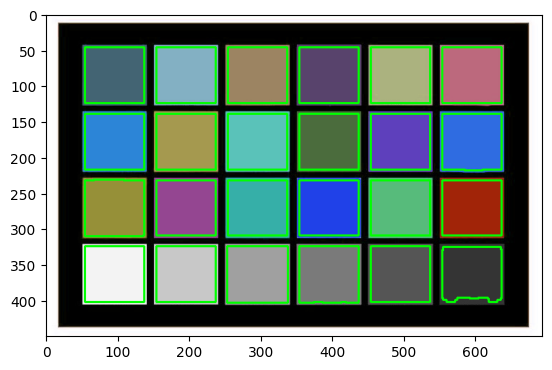

In [1437]:
img_with_contours = img.copy()
img_with_contours = cv2.drawContours(img_with_contours, filtered_contours, -1, (0, 255, 0), 2)

plt.imshow(img_with_contours)

In [1438]:
# Определяем позиции и порядок пятен колорчекера

for cnt in contours:
    x, y = cnt[0][0]
    x = np.floor(x / 10) * 10
    y = np.floor(y / 10) * 10
    cnt[0][0] = [x, y]
positions = sorted(filtered_contours, key=lambda x: (cv2.boundingRect(x)[1], cv2.boundingRect(x)[0]))

In [1439]:
# Получаем значения для каждой зоны
rgb_values = []
i = 0
for pos in positions[:24]:
    mask = np.zeros(gray_img.shape, dtype=np.uint8)
    cv2.drawContours(mask, [pos], -1, color=(255), thickness=-1)
    mean_color = cv2.mean(img, mask=mask)[:-1]
    print(pos[0], list(map(int, mean_color)), known_rgb[i])
    i += 1
    rgb_values.append(mean_color)

rgb_values = np.array(rgb_values)

[[50 40]] [66, 99, 113] [115  82  68]
[[150  40]] [129, 173, 192] [194 150 130]
[[250  40]] [154, 130, 96] [ 98 122 157]
[[350  40]] [87, 66, 107] [ 87 108  67]
[[450  40]] [168, 175, 125] [133 128 177]
[[550  40]] [185, 104, 123] [103 189 170]
[[ 50 130]] [43, 129, 209] [214 126  44]
[[150 130]] [161, 149, 77] [ 80  91 166]
[[250 130]] [87, 189, 180] [193  90  99]
[[350 130]] [73, 105, 59] [ 94  60 108]
[[450 130]] [91, 62, 183] [157 188  64]
[[550 130]] [46, 105, 219] [224 163  46]
[[ 60 230]] [149, 144, 55] [ 56  61 150]
[[150 230]] [147, 69, 144] [ 70 148  73]
[[250 230]] [53, 174, 167] [175  54  60]
[[350 230]] [32, 65, 231] [231 199  31]
[[450 230]] [86, 186, 122] [187  86 149]
[[550 230]] [160, 35, 8] [  8 133 161]
[[ 50 320]] [241, 241, 241] [243 243 242]
[[150 320]] [199, 199, 199] [200 200 200]
[[250 320]] [159, 159, 159] [160 160 160]
[[350 320]] [121, 121, 121] [122 122 121]
[[450 320]] [84, 84, 84] [85 85 85]
[[550 320]] [51, 51, 51] [52 52 52]


In [1440]:
rgb_values

array([[ 66.55932444,  99.31024695, 113.8719841 ],
       [129.44408175, 173.82089129, 192.67953449],
       [154.39057621, 130.7317627 ,  96.96891854],
       [ 87.29477718,  66.41413568, 107.11652001],
       [168.77249503, 175.67683792, 125.5011354 ],
       [185.54499007, 104.13752484, 123.85041158],
       [ 43.12200223, 129.86809816, 209.72964306],
       [161.14751813, 149.46109872,  77.0967652 ],
       [ 87.77746793, 189.2311768 , 180.44171779],
       [ 73.12011719, 105.43805804,  59.45507812],
       [ 91.89299665,  62.55719866, 183.37988281],
       [ 46.02085071, 105.53933834, 219.55699194],
       [149.99269311, 144.01043841,  55.96779004],
       [147.69537691,  69.92152532, 144.70229682],
       [ 53.88722026, 174.69154888, 167.77267373],
       [ 32.07979976,  65.00014723, 231.52223204],
       [ 86.76825677, 186.63486455, 122.79534747],
       [160.66769729,  35.98601296,   8.06198469],
       [241.82289572, 241.82289572, 241.82289572],
       [199.06004022, 199.06004

In [1441]:
# # Расчет матрицы коррекции
# XT_X_int = np.linalg.inv(known_rgb.T @ known_rgb)
# XT_Y = known_rgb.T @ rgb_values
# P = XT_X_int @ XT_Y

# print(f"Матрица цветокоррекции (ccm):\n{P}")

In [1442]:
# corrected_img = img.astype(np.float32) / 255.0
# corrected_img = cv2.transform(img, P)
# corrected_img = np.clip(corrected_img, 0, 255).astype(np.uint8)

# # cv2.imwrite('res.jpg', cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB))

In [1443]:
# Расчет матрицы цветокоррекции (ccm)
CCM, residuals, _, _ = np.linalg.lstsq(rgb_values, known_rgb, rcond=None)
CCM = CCM.T

print(f"Матрица CCM:\n{CCM}")

Матрица CCM:
[[-0.25246453  0.4219236   0.82057073]
 [ 0.7610451  -0.59474799  0.82536013]
 [ 0.76617771  0.41416207 -0.1900491 ]]


In [1444]:
for i in range(24):
    print(known_rgb[i], rgb_values[i], known_rgb[i] - rgb_values[i])

[115  82  68] [ 66.55932444  99.31024695 113.8719841 ] [ 48.44067556 -17.31024695 -45.8719841 ]
[194 150 130] [129.44408175 173.82089129 192.67953449] [ 64.55591825 -23.82089129 -62.67953449]
[ 98 122 157] [154.39057621 130.7317627   96.96891854] [-56.39057621  -8.7317627   60.03108146]
[ 87 108  67] [ 87.29477718  66.41413568 107.11652001] [ -0.29477718  41.58586432 -40.11652001]
[133 128 177] [168.77249503 175.67683792 125.5011354 ] [-35.77249503 -47.67683792  51.4988646 ]
[103 189 170] [185.54499007 104.13752484 123.85041158] [-82.54499007  84.86247516  46.14958842]
[214 126  44] [ 43.12200223 129.86809816 209.72964306] [ 170.87799777   -3.86809816 -165.72964306]
[ 80  91 166] [161.14751813 149.46109872  77.0967652 ] [-81.14751813 -58.46109872  88.9032348 ]
[193  90  99] [ 87.77746793 189.2311768  180.44171779] [105.22253207 -99.2311768  -81.44171779]
[ 94  60 108] [ 73.12011719 105.43805804  59.45507812] [ 20.87988281 -45.43805804  48.54492188]
[157 188  64] [ 91.89299665  62.55719

In [1445]:
# Применяем матрицу
corrected_img = img.copy()
h, w = img.shape[:2]
pixels = np.reshape(corrected_img, (-1, 3))

corrected_img = np.dot(pixels, CCM.T)
corrected_img = np.clip(corrected_img, 0, 255).astype(np.uint8)
corrected_img = np.reshape(corrected_img, (h, w, 3))

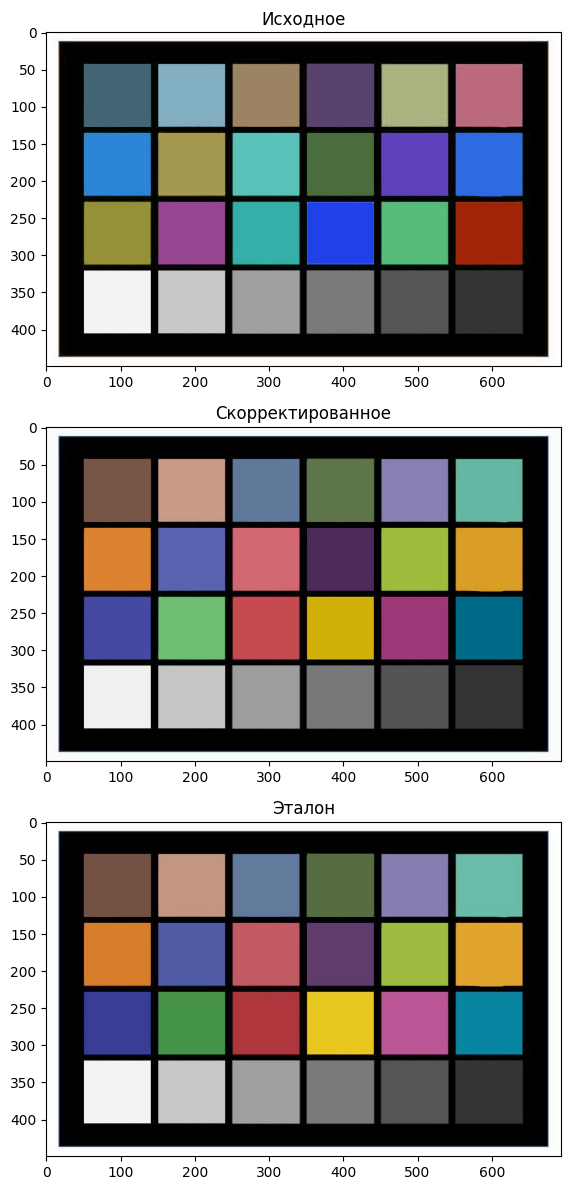

In [1446]:
# Отображение
perfect = cv2.imread('Color_Checker.pdf.jpg')
perfect = cv2.cvtColor(perfect, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))
axes[0].imshow(img)
axes[0].set_title('Исходное')
axes[1].imshow(corrected_img)
axes[1].set_title('Скорректированное')
axes[2].imshow(perfect)
axes[2].set_title('Эталон')

plt.tight_layout()